In [145]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder
from xgboost import XGBClassifier

In [146]:
dataTrain = pd.read_csv('dataset/train.csv')
dataTest = pd.read_csv('dataset/test.csv')
dataSample_Submission = pd.read_csv('dataset/sample_submission.csv')

### Data Exploratory

In [147]:
dataTrain.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5695 entries, 0 to 5694
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Unnamed: 0          5695 non-null   int64 
 1   Profession          5695 non-null   object
 2   Income              5695 non-null   int64 
 3   Credit_card_number  5695 non-null   int64 
 4   Expiry              5695 non-null   object
 5   Security_code       5695 non-null   int64 
 6   Fraud               5695 non-null   int64 
dtypes: int64(5), object(2)
memory usage: 311.6+ KB


In [148]:
X = dataTrain.drop(columns=['Fraud', 'Unnamed: 0', 'Credit_card_number', 'Expiry'])
y = dataTrain['Fraud']
print(X)
print(y)

     Profession  Income  Security_code
0        LAWYER     645            548
1      ENGINEER   88558            917
2      ENGINEER   48908            600
3        DOCTOR   25335            315
4        DOCTOR   86034            228
...         ...     ...            ...
5690     LAWYER   16738             19
5691     LAWYER   28259             12
5692   ENGINEER   97940            516
5693     DOCTOR   82297            977
5694     DOCTOR   34560            856

[5695 rows x 3 columns]
0       0
1       0
2       1
3       0
4       0
       ..
5690    0
5691    1
5692    1
5693    1
5694    0
Name: Fraud, Length: 5695, dtype: int64


C:\Users\Syauqi Nabil\AppData\Local\Temp\ipykernel_3640\734153836.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Fraud', data=dataTrain, palette='viridis')


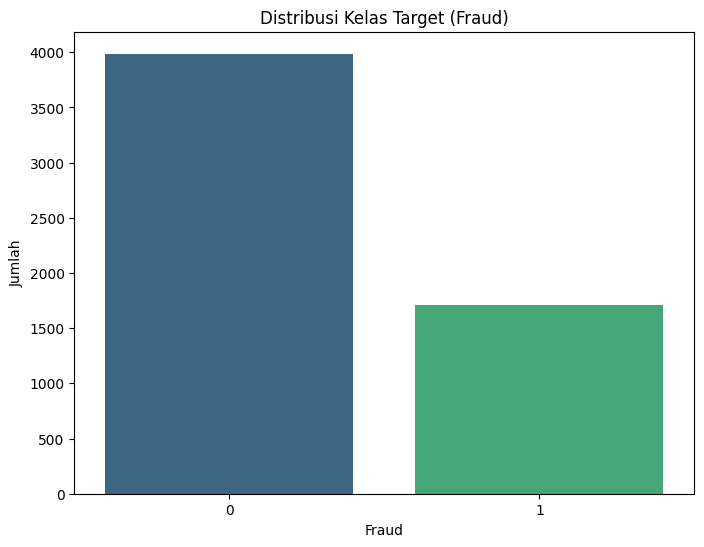

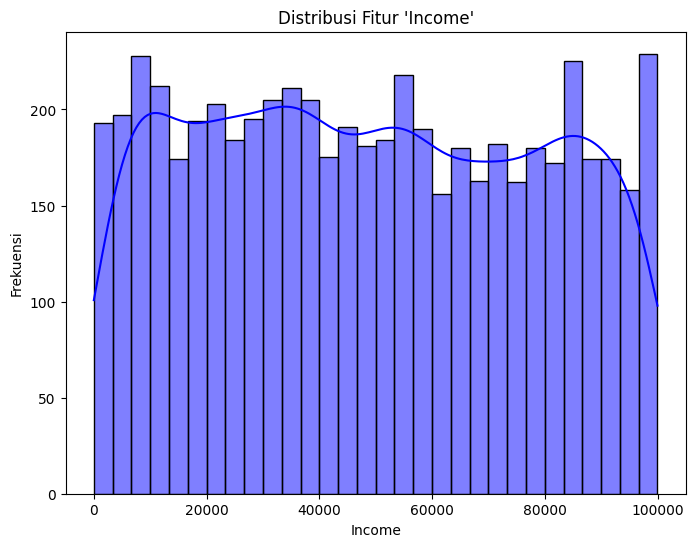

C:\Users\Syauqi Nabil\AppData\Local\Temp\ipykernel_3640\734153836.py:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Fraud', y='Income', data=dataTrain, palette='Set2')


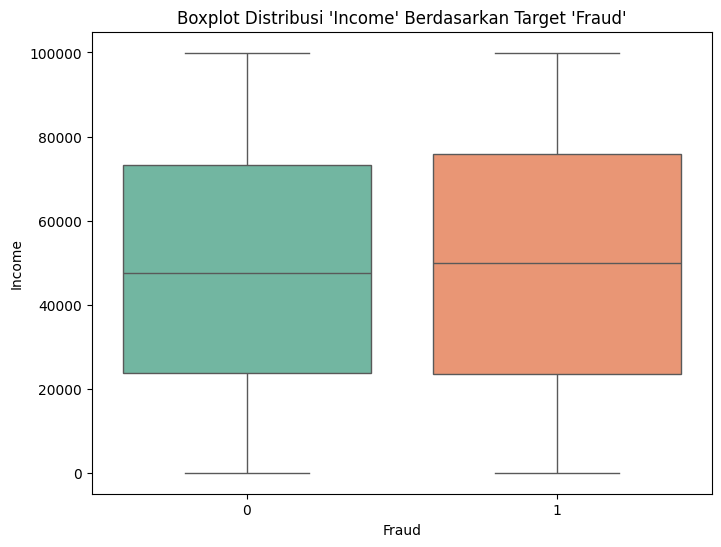

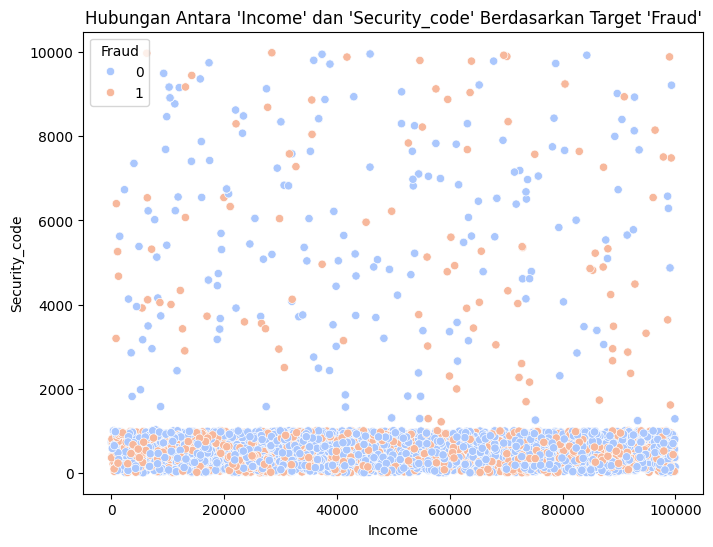

In [149]:
# Visualisasi heatmap korelasi antar fitur
# plt.figure(figsize=(10, 8))
# correlation_matrix = dataTrain.corr()
# sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
# plt.title("Heatmap Korelasi Antar Fitur")
# plt.show()

# Visualisasi grafik batang untuk distribusi kelas target (Fraud)
plt.figure(figsize=(8, 6))
sns.countplot(x='Fraud', data=dataTrain, palette='viridis')
plt.title("Distribusi Kelas Target (Fraud)")
plt.xlabel("Fraud")
plt.ylabel("Jumlah")
plt.show()

# Visualisasi distribusi fitur 'Income'
plt.figure(figsize=(8, 6))
sns.histplot(dataTrain['Income'], kde=True, color='blue', bins=30)
plt.title("Distribusi Fitur 'Income'")
plt.xlabel("Income")
plt.ylabel("Frekuensi")
plt.show()

# Visualisasi boxplot untuk fitur 'Income' berdasarkan target 'Fraud'
plt.figure(figsize=(8, 6))
sns.boxplot(x='Fraud', y='Income', data=dataTrain, palette='Set2')
plt.title("Boxplot Distribusi 'Income' Berdasarkan Target 'Fraud'")
plt.xlabel("Fraud")
plt.ylabel("Income")
plt.show()

# Visualisasi hubungan antara Income dan Security_code menggunakan scatter plot
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Income', y='Security_code', hue='Fraud', data=dataTrain, palette='coolwarm')
plt.title("Hubungan Antara 'Income' dan 'Security_code' Berdasarkan Target 'Fraud'")
plt.xlabel("Income")
plt.ylabel("Security_code")
plt.show()


### Data Preprocessing

In [150]:
X_train = dataTrain.drop(columns=['Unnamed: 0', 'Credit_card_number', 'Expiry', 'Fraud'])
X_test = dataTest.drop(columns=['Unnamed: 0', 'Credit_card_number', 'Expiry'])
y_train = dataTrain['Fraud']

X_train.head()

,Profession,Income,Security_code
0,LAWYER,645,548
1,ENGINEER,88558,917
2,ENGINEER,48908,600
3,DOCTOR,25335,315
4,DOCTOR,86034,228


In [151]:
X_test.head()

,Profession,Income,Security_code
0,DOCTOR,7548,904
1,ENGINEER,15017,988
2,LAWYER,52898,891
3,DOCTOR,14264,541
4,ENGINEER,37128,313


In [152]:
y_train.head()

0    0
1    0
2    1
3    0
4    0
Name: Fraud, dtype: int64

In [159]:
le = LabelEncoder()

X_train_processed = pd.DataFrame(le.fit_transform(X_train['Profession']), columns=['Profession_encoded'])
X_test_processed = pd.DataFrame(le.transform(X_test['Profession']), columns=['Profession_encoded'])

X_train_processed.head()

,Profession_encoded
0,2
1,1
2,1
3,0
4,0


In [160]:
X_test_processed.head()

,Profession_encoded
0,0
1,1
2,2
3,0
4,1


### Modelling

In [165]:
model = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
model.fit(X_train_processed, y_train)

y_pred_proba = model.predict(X_test_processed)

output = pd.DataFrame({
    "fraud_Proba": y_pred_proba
})

output.head()

c:\Users\Syauqi Nabil\Lectures\Online Courses\GDGoC ITS\ML\Tugas\ml-competition-gd-go-c-its\.venv\Lib\site-packages\xgboost\training.py:183: UserWarning: [15:02:17] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


,fraud_Proba
0,0
1,0
2,0
3,0
4,0


In [166]:
dataTest['Fraud_proba'] = y_pred_proba

print("Contoh output probabilitas dari test data:")
pd.options.display.float_format = '{:.6f}'.format
print(dataTest[['Fraud_proba']].head())

Contoh output probabilitas dari test data:
   Fraud_proba
0            0
1            0
2            0
3            0
4            0


In [167]:
data_submission = pd.read_csv("dataset/sample_submission.csv")
data_predictions = dataTest['Fraud_proba']

submission_format1 = pd.concat([data_submission, data_predictions], axis=1)
# submission_format1.drop('ID', axis=1, inplace=True)
submission_format1.drop('Fraud', axis=1, inplace=True)

print(submission_format1.head())
submission_format1.to_csv('myResults/submissionv0.csv', index=False, float_format="%.10f")

     ID  Fraud_proba
0  2274            0
1  5355            0
2  5877            0
3  9828            0
4  1420            0


In [169]:
submission = pd.read_csv('myResults/submissionv0.csv')